# **Segmentazione Tramite Sogliatura in scala di Grigi e Analisi dei Colori HSV**
***

Giuseppe Perricone (S5581676) <br>

Collabolatori: 
- Nocco Sofia (S5589706)
- Ho sfruttato chatGPT per alcune implementazioni del codice

! I link che portano a sezioni diverse all'interno del progetto funzionano, ma mostrano la parte interessata in basso. 

## Introduzione e Obiettivo 

Dato il seguente dataset di immagini l'obiettivo dell'esperienza è quello di segmentare delle cellule di malaria; "separando" quindi le cellule dalla malattia.
Anticpo che i due approcci da me utilizzati sono:
1. Segmentazione lavorando in scala di grigi, e sfruttando una sogliatura (vedere sezione relativa al [metodo-1](#id-metodo1))
2. Segmentazione lavorando in HSV e sfruttare questo spazio di colore per rimuovere le aree con tonalità simile a viola (vedere sezione relativa al [metodo-2](#id-metodo2))

![Dataset](Dataset.png) 

### Cos'è. E cosa rende una segmentazione ottimale?
La segmentazione è un processo in cui un'immagine digitale viene divisa in diverse regioni, ognuna delle quali rappresenta un oggetto o una parte di esso presente nell'immagine stessa. Una segmentazione è considerata "buona" quando soddisfa i seguenti criteri:
- Tutti i pixel all'interno di una stessa regione dovrebbero avere **caratteristiche simili** (colore, intensità, texture) tra loro.
- Le **regioni vicine fra loro** dovrebbero essere **più diverse possibile**, in modo da evidenziare i confini degli oggetti.
- Il risultato della segmentazione dovrebbe essere abbastanza coerente con il nostro modo di percepire le varie sezioni dell'immagine.

In sostanza una segmentazione è buona quando si riesce bene a distinguere, e separare le diverse regioni di interesse in un'immagine.

## Metodi
Per raggiungere l'obiettivo finale ho effettuato un'analisi del dataset, con lo scopo di identificare le possibili difficoltà e i differenti metodi di approccio. <br> Dopo aver fatto ciò ho implementato due algoritmi differenti.

#### **Analisi Del Dataset - Osservazioni**
Come si può vedere vi è un gran numero di cellule che differiscono l'una dall'altra sia dalla dimensione, sia dal colore, sia dalla forma. Inoltre in quasi tutte le immagini sono visibili alcuni artefatti che confondono un po' la visione della cellula: <br> <br>
un esempio di **artefatti** possono essere alcune piccole macchie, che tuttavia sono di colore differente dalla malattia, quindi non si riesce a comprendere bene cosa siano, oppure anche lo sfondo stesso. La problematica principale di questi artefatti è che quest'ultimi potrebbero essere rimossi come parte della malattia, oppure influenzare in modo negativo la segmentazione.<br>
Ciò che si può fare è quindi sfruttare delle tecniche appropriate di pre-processing (link: cos'è il pre-processing) per filtrare correttamente le informazioni. Per esempio io durante l'analisi ho ignorato i pixel dello sfondo.

La **colorazione** delle singole cellule verrà analizzata meglio in seguito, sfruttando degli [istogrammi](#id-istogrammi), tuttavia possiamo già affermare con certezza che: la differenza di colore tra le varie cellule è un problema, nel caso si voglia sfruttare un algoritmo di segmentazione che fa affidamento, sull'utilizzo di una soglia fissa per identificare il colore della malattia. Posso affermare ciò perchè è proprio quello che mi è successo durante l'uso del primo metodo di segmentazione che ho provato a implementare (link al segnalibro del notebook quando avrò inserito quella parte). <br> <br>

La **dimensione** e la **forma** delle singole cellule può invece costituire un problema per algoritmi che fanno uso di forme geometriche, o comunque di identificazione dei contorni.<br>
Infatti identificare i contorni della cellula, e anche della malattia, potrebbe risultare molto complesso proprio a causa del fatto che le cellule non sono di dimensioni e forme simili fra loro, inoltre vi sono alcune immagini dove l'area della malattia non è proprio ben definita. 

(link agli [istogrammi](#id-istogrammi) nella sezione esperimenti se si vuole vedere l'analisi).

<h4  id="id-metodo1"> <b> Metodo 1 - Segmentazione tramite sogliatura lavorando in scala di grigi </b> </h4> 

Prendendo ispirazione da uno dei [link](https://medium.com/@flcamarao/image-processing-using-python-image-segmentation-98d2ebe44bfe) forniti per il progetto, ho scelto di implementare questo metodo perchè lavorare con un'immagine in scala di grigi mi permette di ridurre la complessità rispetto alle immagini a colori. <br> Infatti a differenza di quest'ultime le immagini in scala di grigi posseggono un solo canale, a differenza dei 3 presenti nello spazio RGB. Di conseguenza ciò mi permette di avere un focus maggiore solo su determinate aree dell'immagine, anche se ciò potrebbe portare anche ad una perdita di dettagli. Quest'aspetto in particolare sulla perdita di dettagli non è per forza da considerare come aspetto negativo: <br>
delle volte, sopratutto nelle immagini con una forte quantità di rumore, può essere utile andare a perdere delle informazioni. <br>

Dopo aver convertito l'immagine in scala di grigi ho scelto di effettuare una sogliatura, ques'ultima permette di seperare oggetti dallo sfondo, basandosi sull'utilizzo di una soglia, e sui valori dei pixel dell'immagine. ecco come funziona: <br>
Imposto un valore soglia 𝑇. I pixel dell'immagine vengono in seguito confrontati con 𝑇:
- Se il valore di intensità di un pixel è maggiore o uguale a 𝑇, il pixel diventa bianco (o nero) <br>
- Se il valore di intensità di un pixel è minore di 𝑇, il pixel diventa nero (o bianco).
<br> 

Questo processo trasforma l'immagine originale in una immagine binaria, con due soli valori, ovvero 0 e 1  (nero e bianco). <br>

Ho scelto di effettuare queste due operazioni assieme perchè: tramite la scala di grigi vengono messe in evidenza le differenze tra gli oggetti che mi interessa segmentare, (nel nostro caso la malattia) e lo sfondo (nel nostro caso la cellula), ciò permette quindi di rendere la sogliatura molto più precisa. <br>
Inoltre inizialmente ho scelto questo approccio perchè è un algoritmo indipendente dallo studio dei colori dell'immagine, quindi potenzialmente può funzionare indipendentemente dai colori della malattia e della cellula (ovviemente questi due oggetti devono avere intensità di pixel differenti altrimenti non funziona).

#### Passi dell'algoritmo:
1. Ridimensionamento dell'immagine, in modo tale che tutte le immagini posseggano le stesse dimensioni
2. Conversione dell'immagine in scala di grigi
3. Applico una prima sogliatura con l'obiettivo di rimuovere lo sfondo nero --> i pixel che hanno un valore maggiore di 0 (nero) vengono impostati come bianchi, in questo modo ricavo una maschera che applico all'immagine originale per rimuovere lo sfondo
4. Eseguo un miglioramento del contrasto sull'immagine risultante (in scala di grigi), tramite equalizzazione dell'istogramma. Quest'ultima mi consente di effettuare una sogliatura ancora più precisa, dal momento che l'equalizzazione rende più uniforme i valori dell'istogramma, in questo modo diciamo che vengono distribuiti in maniera più omogenea i livelli di grigio in tutta l'immagine. Di conseguenza le zone scure diventano più scure e le zone chiare più chiare, aumentando la differenza tra le due. In questo modo i bordi tra le diverse regioni dell'immagine diventano più definiti, facilitando la loro individuazione tramite sogliatura. Tuttavia può anche capitare che, in presenza di rumore, l'equalizzazione dell'istogramma vada rendere questo rumore ancora più evidente peggiorando quindi la situazione (questo è ciò che succede in alcune immagini).
5. Eseguo la sogliatura sull'immagine risultante dal miglioramento del contrasto, in modo tale da ottenere la maschera che poi applicherò all'immagine.
6. Effettuo operazioni di EROSIONE e Dilatazione, con l'obiettivo di pulire la maschera e di renderla ancora più precisa rimuovendo il rumore ([link](https://medium.com/@jaskaranbhatia/exploring-image-segmentation-techniques-watershed-algorithm-using-opencv-9f73d2bc7c5a) da cui ho visto cosa sono le operazioni di erosione e dilatazione, punto 2 sul sito. Altri dettagli nella sezione [esperimenti](#id-esperimenti) del notebook)
7. Applico la maschera risultante all'immagine

Per vedere bene l'applicazione dell'algoritmo passo dopo passo andare nella sezione [Esperimenti](#id-esperimenti).<br>

Le considerazioni finali su questo metodo, incluso il valore di soglia scelto, sono presenti nella sezione [Approfondimenti]()





<h4 id="id-metodo2"> <b> Metodo 2 - Segmentazione in spazio di colori HSV</b> </h4>

Siccome non mi hanno soddisfatto particolarmente i risultati ottenuti con il metodo precedente ho scelto di implementarne un secondo, basato su uno spazio di colore totalmente diverso, ovvero HSV. <br>    
L'idea di questo algoritmo nasce dall'analisi degli istogrammi delle immagini. Infatti, come possibile osservare in [esperimenti](#id-esperimenti), le tonalità principali delle cellule sono ottenute da una combinazione di colori che prevede principalmente l'uso del rosso e del blu. <br>
Di conseguenza possiamo affermare che il colore della malattia in tutte le cellule ha una tonalità che varia dal rosa al viola, ma non fuoriesce mai da questo range di valori. <br>
Ho quindi pensato di sfruttare questa caratteristica per implementare un algoritmo in HSV che permetta di filtrare l'immagine basandosi sul livello di saturazione di alcune tonalità di viola, in modo tale da rimuovere le tracce di malattia dalla cellula.

Per vedere maggiori dettagli su questo algoritmo controllare la sezione [Approfondimenti](). <br>
Per l'applicazione dell'algoritmo su alcune immagini controllare la sezione [Esperimenti](#id-esperimenti)

<h2  id="id-esperimenti"> <b> ESPERIMENTI - Codice degli algoritmi </b> </h2> 

Questa sezione del notebook è riservata per le prove più "pratiche". Importo quindi le librerie che serviranno per l'esecuzione del codice:



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import measure, morphology
import os #per poter prendere le immagini nella cartella di input e iterare 

<h4  id="id-istogrammi"> Analisi del Dataset - Analisi Degli Istogrammi </h4> 

Come annunciato precedentemente parte dell'analisi che ho fatto sul dataset è relativa alla parte di analisi del colore delle immagini tramite istogrammi, in modo tale da capire se vi fosse qualche effettiva similitude tra le colorazioni delle varie immagini. <br>
Ovviamente non stampare gli istogrammi di tutte 150 le immagini, di conseguenza effettuo una sorta di campionamento prendendo solo alcune immagini che avranno il compito di "rappresentare" tutte le immagini simili a quest'ultima.
Le immagini scelte sono:
- (1) 
- (14)
- (26)
- (86)
- (94)
- (110)
- (139)

Ora che ho scelto le immagini ne calcolo gli istogrammi per analizzare la distribuzione del colore all'interno dei 3 canali RGB. **Non prendo in considerazione il colore dello sfondo**


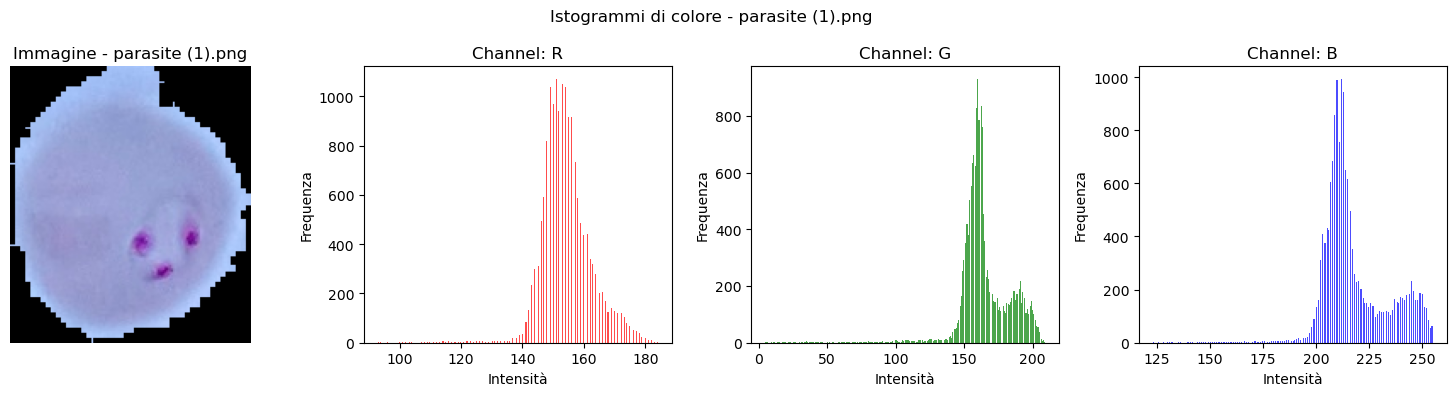

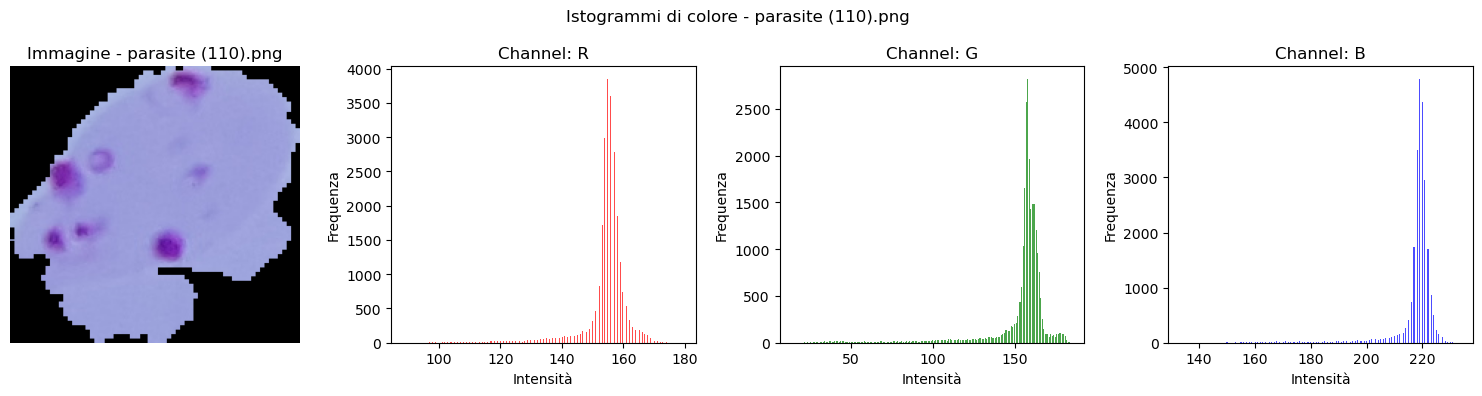

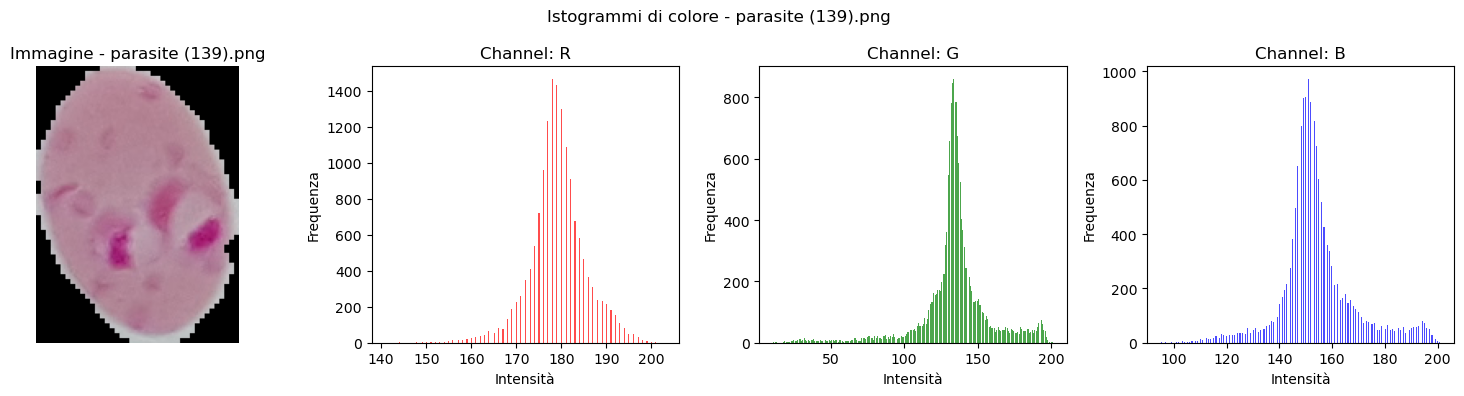

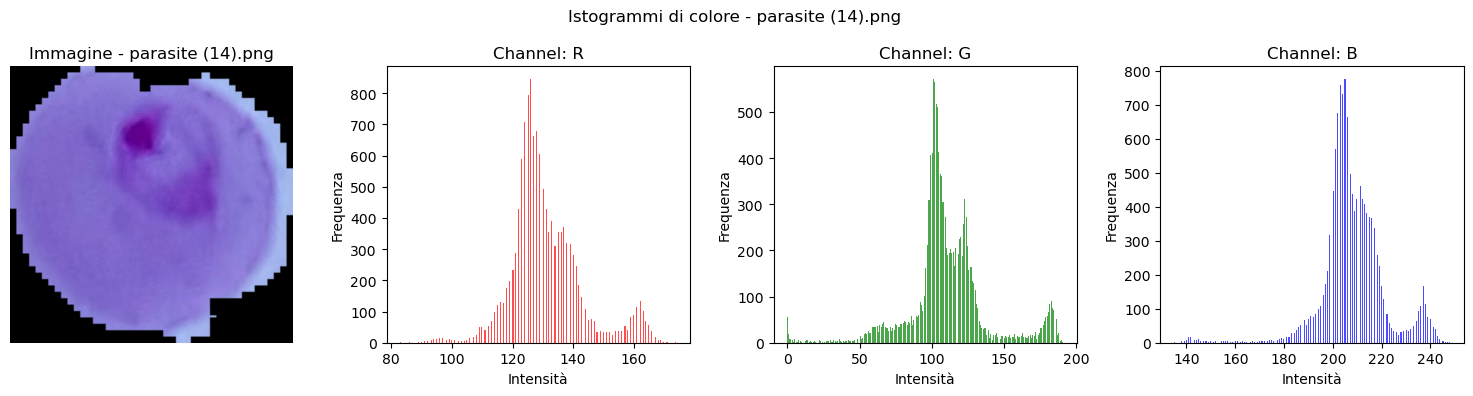

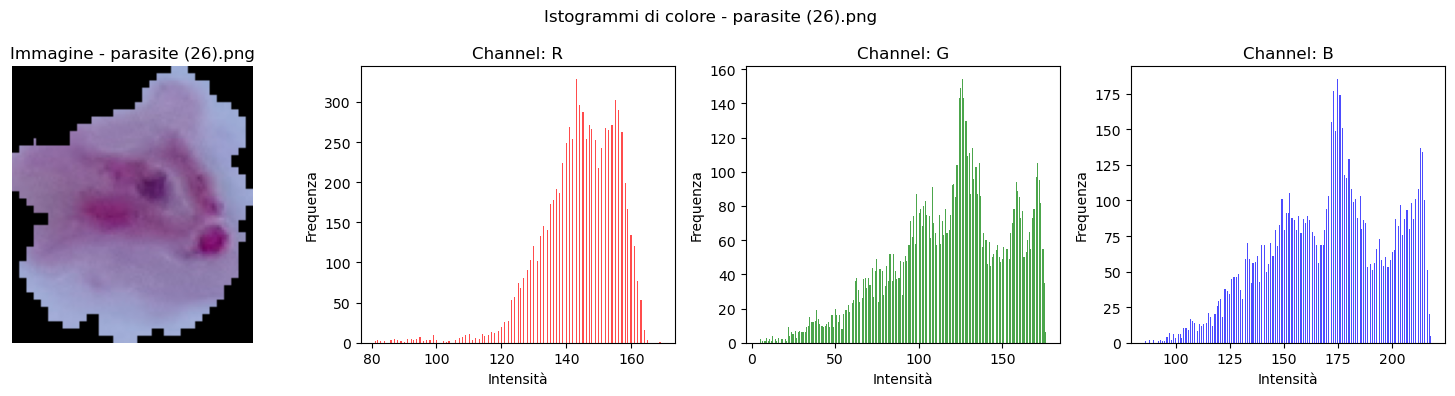

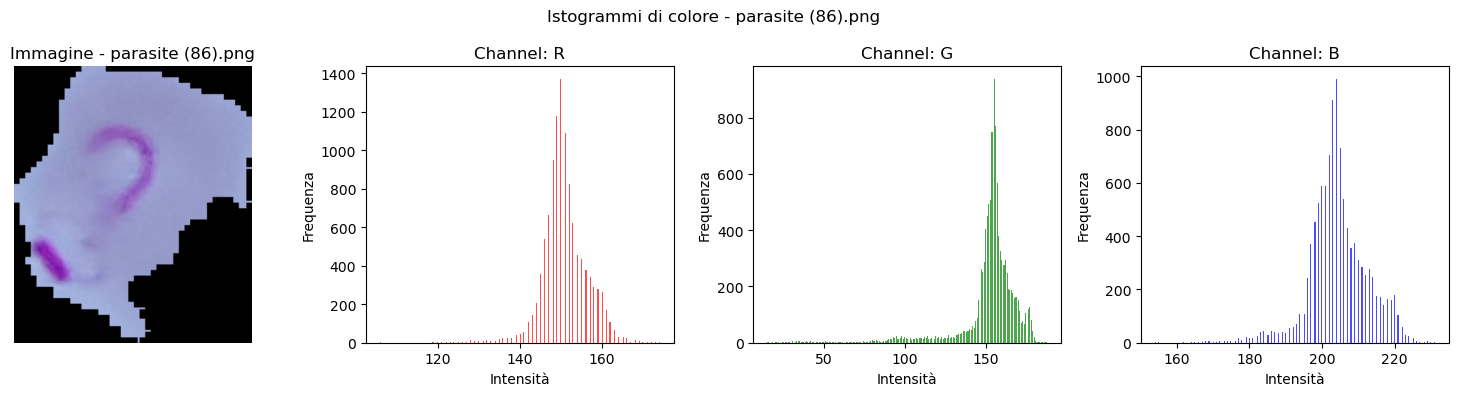

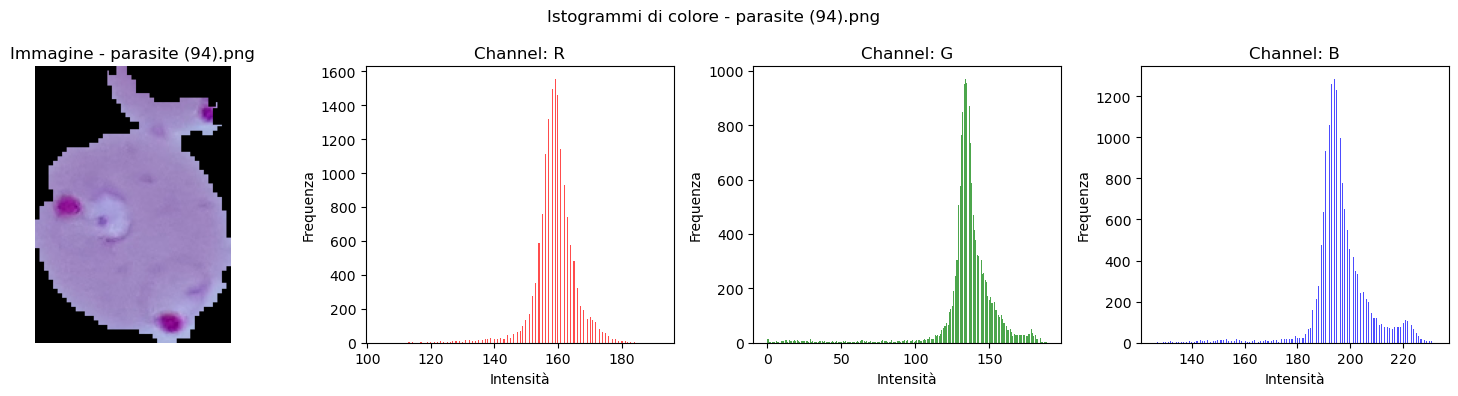

In [7]:
input_folder = 'FESI/Progetto/ImmaginiCampioni'
color_channels = ('R', 'G', 'B')

for filename in os.listdir(input_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'): 
        input_path = os.path.join(input_folder, filename)
        
        image = cv2.imread(input_path)
        img_array = np.array(image)
        
        # Maschera per escludere i pixel neri (valori RGB = [0, 0, 0])
        non_black_mask = np.any(img_array > 0, axis=2)
        
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 4, 1)
        plt.imshow(image)
        plt.title(f"Immagine - {filename}")
        plt.axis('off')  
        
        for j, color in enumerate(color_channels):    
            # Applico la maschera per escludere i pixel neri
            channel_values = img_array[:, :, j][non_black_mask].flatten()
            
            plt.subplot(1, 4, j + 2)
            plt.hist(channel_values, bins=256, color=color.lower(), alpha=0.7)
            plt.title(f"Channel: {color}")
            plt.xlabel("Intensità")
            plt.ylabel("Frequenza")
        
        plt.suptitle(f"Istogrammi di colore - {filename}")
        plt.tight_layout()
        plt.show()

Grazie a questa analisi degli istogrammi si può notare che, le tonalità principali delle cellule sono ottenute da una combinazione di colori che prevede principalmente l'uso del rosso e del blu. <br> Infatti, anche se a primo impatto gli istogrammi sembrano equidistribuiti, sia la parte di rosso, che la parte di blu, possiedono un valore di frequenza maggiore rispetto al verde in tutte e 7 le immagini.  
Le informazioni ottenute sulla tonalità possono quindi essere utili per la progettazione di algoritmi che prevedono l'uso del colore per effettuare una buona segmentazione (come il secondo metodo che ho implementato --> [link](#id-metodo2)).

Nonostante ciò bisogna prestare attenzione, perchè lavorare con un immagine a colori può essere complesso a causa del maggior numero di informazioni da gestire.

### **Implementazione Metodo 1**

(da scrivere)

## APPROFONDIMENTI - Considerazioni finali